## Problem 2-a: Mean Intensity of a Hemisphere Surface

We are given a hemisphere of radius $R$ where the intensity at each point on the surface is defined by:

$$
I(\rho, \phi, z) = I_{\text{max}} z
$$

In spherical coordinates, the hemisphere surface can be parametrized as:

- $x = R \sin\theta \cos\phi$
- $y = R \sin\theta \sin\phi$
- $z = R \cos\theta$

Where:

- $\theta \in [0, \frac{\pi}{2}]$ (only the upper hemisphere),
- $\phi \in [0, 2\pi]$.

The surface element on a sphere in spherical coordinates is:

$$
dS = R^2 \sin\theta \, d\theta \, d\phi
$$

The intensity becomes:

$$
I(\theta) = I_{\text{max}} R \cos\theta
$$

The mean intensity over the hemisphere surface is defined as:

$$
\bar{I} = \frac{1}{A} \int_S I \, dS
$$

The surface area of a hemisphere is:

$$
A = 2\pi R^2
$$

Substituting into the integral:

$$
\bar{I} = \frac{1}{2\pi R^2} \int_0^{2\pi} \int_0^{\frac{\pi}{2}} I_{\text{max}} R \cos\theta \cdot R^2 \sin\theta \, d\theta \, d\phi
$$

Simplifying:

$$
\bar{I} = \frac{I_{\text{max}} R^3}{2\pi R^2} \int_0^{2\pi} \int_0^{\frac{\pi}{2}} \cos\theta \sin\theta \, d\theta \, d\phi = \frac{I_{\text{max}} R}{2\pi} \cdot \int_0^{2\pi} d\phi \cdot \int_0^{\frac{\pi}{2}} \cos\theta \sin\theta \, d\theta
$$

Evaluating the integrals:

$$
\int_0^{2\pi} d\phi = 2\pi, \quad \int_0^{\frac{\pi}{2}} \cos\theta \sin\theta \, d\theta = \frac{1}{2}
$$

Final result:

$$
\bar{I} = \frac{I_{\text{max}} R}{2}
$$

✅ **Therefore, the mean surface intensity is:**  
$$
\boxed{ \bar{I} = \frac{1}{2} I_{\text{max}} R }
$$


## Problem 2-b: Interpretation and Elimination of Geometrical Effects

### Physical Interpretation of the Result

From part 2-a, we found that the mean intensity over the hemisphere is:

$$
\bar{I} = \frac{1}{2} I_{\text{max}} R
$$

This result tells us that the **average brightness increases linearly with the radius $R$**, assuming $I_{\text{max}}$ is constant. However, the intensity is not uniformly distributed — it varies with $\theta$ (i.e., with height $z$), since:

$$
I(\theta) = I_{\text{max}} R \cos\theta
$$

This means:

- At the **top of the hemisphere** ($\theta = 0$, i.e. $z = R$), the intensity is **maximum**:  
  $I = I_{\text{max}} R$
- At the **equator** ($\theta = \frac{\pi}{2}$, i.e. $z = 0$), the intensity is **zero**.

Thus, the **brightness gradually increases from the base to the top** of the hemisphere.

---

### Eliminating Geometrical Effects

In some engineering applications, it may be desirable to **eliminate the effect of geometry (radius $R$)** on the mean intensity so that brightness appears uniform or standardized regardless of hemisphere size.

From the mean intensity formula:

$$
\bar{I} = \frac{1}{2} I_{\text{max}} R
$$

To make $\bar{I}$ independent of $R$, we should choose $I_{\text{max}}$ such that the product $I_{\text{max}} R$ is constant. This can be achieved by selecting:

$$
I_{\text{max}} = \frac{C}{R}
$$

Or more generally:

$$
I_{\text{max}} = R^{\alpha}
$$

For $\bar{I}$ to be independent of $R$:

$$
\bar{I} = \frac{1}{2} I_{\text{max}} R = \frac{1}{2} R^{\alpha} R = \frac{1}{2} R^{\alpha + 1}
$$

So to eliminate all geometrical effects, we must have:

$$
\alpha + 1 = 0 \quad \Rightarrow \quad \boxed{\alpha = -1}
$$

---

### ✅ Final Conclusion

The engineer's suggestion to use $I_{\text{max}} = R^\alpha$ **is wise only if** $\alpha = -1$. This choice makes the **mean surface intensity constant** regardless of the hemisphere's radius:

$$
\bar{I} = \frac{1}{2} R^{-1} \cdot R = \frac{1}{2}
$$

So, **yes — it is a wise suggestion only if** $\boxed{I_{\text{max}} = \frac{1}{R}}$.


## Problem 2-c: Top-View Projection of the Hemisphere

We are tasked with generating a **512×512 image** of a hemisphere, viewed from the top, where the intensity at each point on the surface is defined by:

$$
I(x, y) = I_{\text{max}} \cdot z = I_{\text{max}} \cdot \sqrt{R^2 - x^2 - y^2}
$$

This follows from the geometry of a hemisphere:
- $x^2 + y^2 + z^2 = R^2$
- $z = \sqrt{R^2 - x^2 - y^2}$ for the upper hemisphere
- $I = 0$ when $x^2 + y^2 > R^2$ (outside the hemisphere)

We will:
1. Map each pixel $(i, j)$ of the 512×512 image to Cartesian coordinates $(x, y)$ in the range $[-R, R]$
2. For each $(x, y)$:
   - If inside the hemisphere ($x^2 + y^2 \le R^2$), compute $z$
   - Else, set intensity to 0
3. Normalize intensity to [0, 1] for display

From **2-b**, we use:

$$
I_{\text{max}} = R^{\alpha} \quad \text{with} \quad \alpha = -1 \Rightarrow I_{\text{max}} = \frac{1}{R}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
image_size = 512
R = 1
alpha = -1
I_max = (R ** alpha) * 255

In [24]:
x = np.linspace(-R, R, image_size)
y = np.linspace(-R, R, image_size)

X, Y = np.meshgrid(x, y)

In [25]:
rho = np.sqrt(X**2 + Y**2)

In [26]:
z = np.zeros_like(X)

In [27]:
z[rho<= R] = np.sqrt(R**2 - (rho[rho <= R])**2)

In [28]:
intensity = I_max * z

In [29]:
intensity = np.clip(intensity, 0, 255)

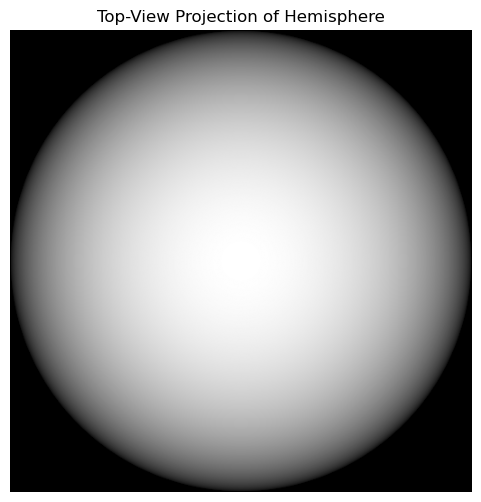

In [30]:
plt.figure(figsize=(6, 6))
plt.imshow(intensity, cmap='gray', extent=[-R, R, -R, R])
plt.axis('off')
plt.title('Top-View Projection of Hemisphere')
plt.show()

In [35]:
mean_intensity_with_frame = np.mean(intensity)

# Display the result
print("Mean Intensity with Full Frame:", mean_intensity_with_frame)

Mean Intensity with Full Frame: 132.99547987060927


In [36]:
valid_pixels = intensity[rho <= R]

# Compute the mean intensity
mean_intensity_top_view = np.mean(valid_pixels)

# Display the result
print("Mean Intensity of the Top-View Image:", mean_intensity_top_view)


Mean Intensity of the Top-View Image: 170.0581774491298
